In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from fbprophet import Prophet

In [23]:
import math
from sklearn.preprocessing import minmax_scale

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
stores = pd.read_csv('data/stores.csv')
feature = pd.read_csv('data/features.csv')

In [6]:
test.insert(3, 'Weekly_Sales', 0)

In [7]:
#merged = pd.concat([train, test], axis=0)
merged = train.copy()
merged = merged.sort_values(by=['Store','Dept','Date'])
mf = feature.merge(stores, how='inner', on=['Store'])
merged = pd.merge(merged, mf, how='inner', on=['Date','Store','IsHoliday'])

In [8]:
merged['Date'] = pd.to_datetime(merged['Date']) 

In [9]:
merged['month'] = merged['Date'].dt.month
merged['year'] = merged['Date'].dt.year

In [10]:
merged.fillna(-999, inplace=True)

In [11]:
merged['int_date'] = merged['Date'].dt.to_period('M') - merged['Date'].min().to_period('M')

In [158]:
merged['int_week'] = merged['Date'].dt.week
merged['week'] = merged['Date'].dt.week

In [13]:
merged['int_week'].loc[merged[merged['year']==2011].index] += 52
merged['int_week'].loc[merged[merged['year']==2012].index] += 52+52

In [14]:
holiday = pd.DataFrame(merged[merged['IsHoliday']]['Date'].unique())
holiday['holiday'] = 'h'
holiday.columns=['ds','holiday']

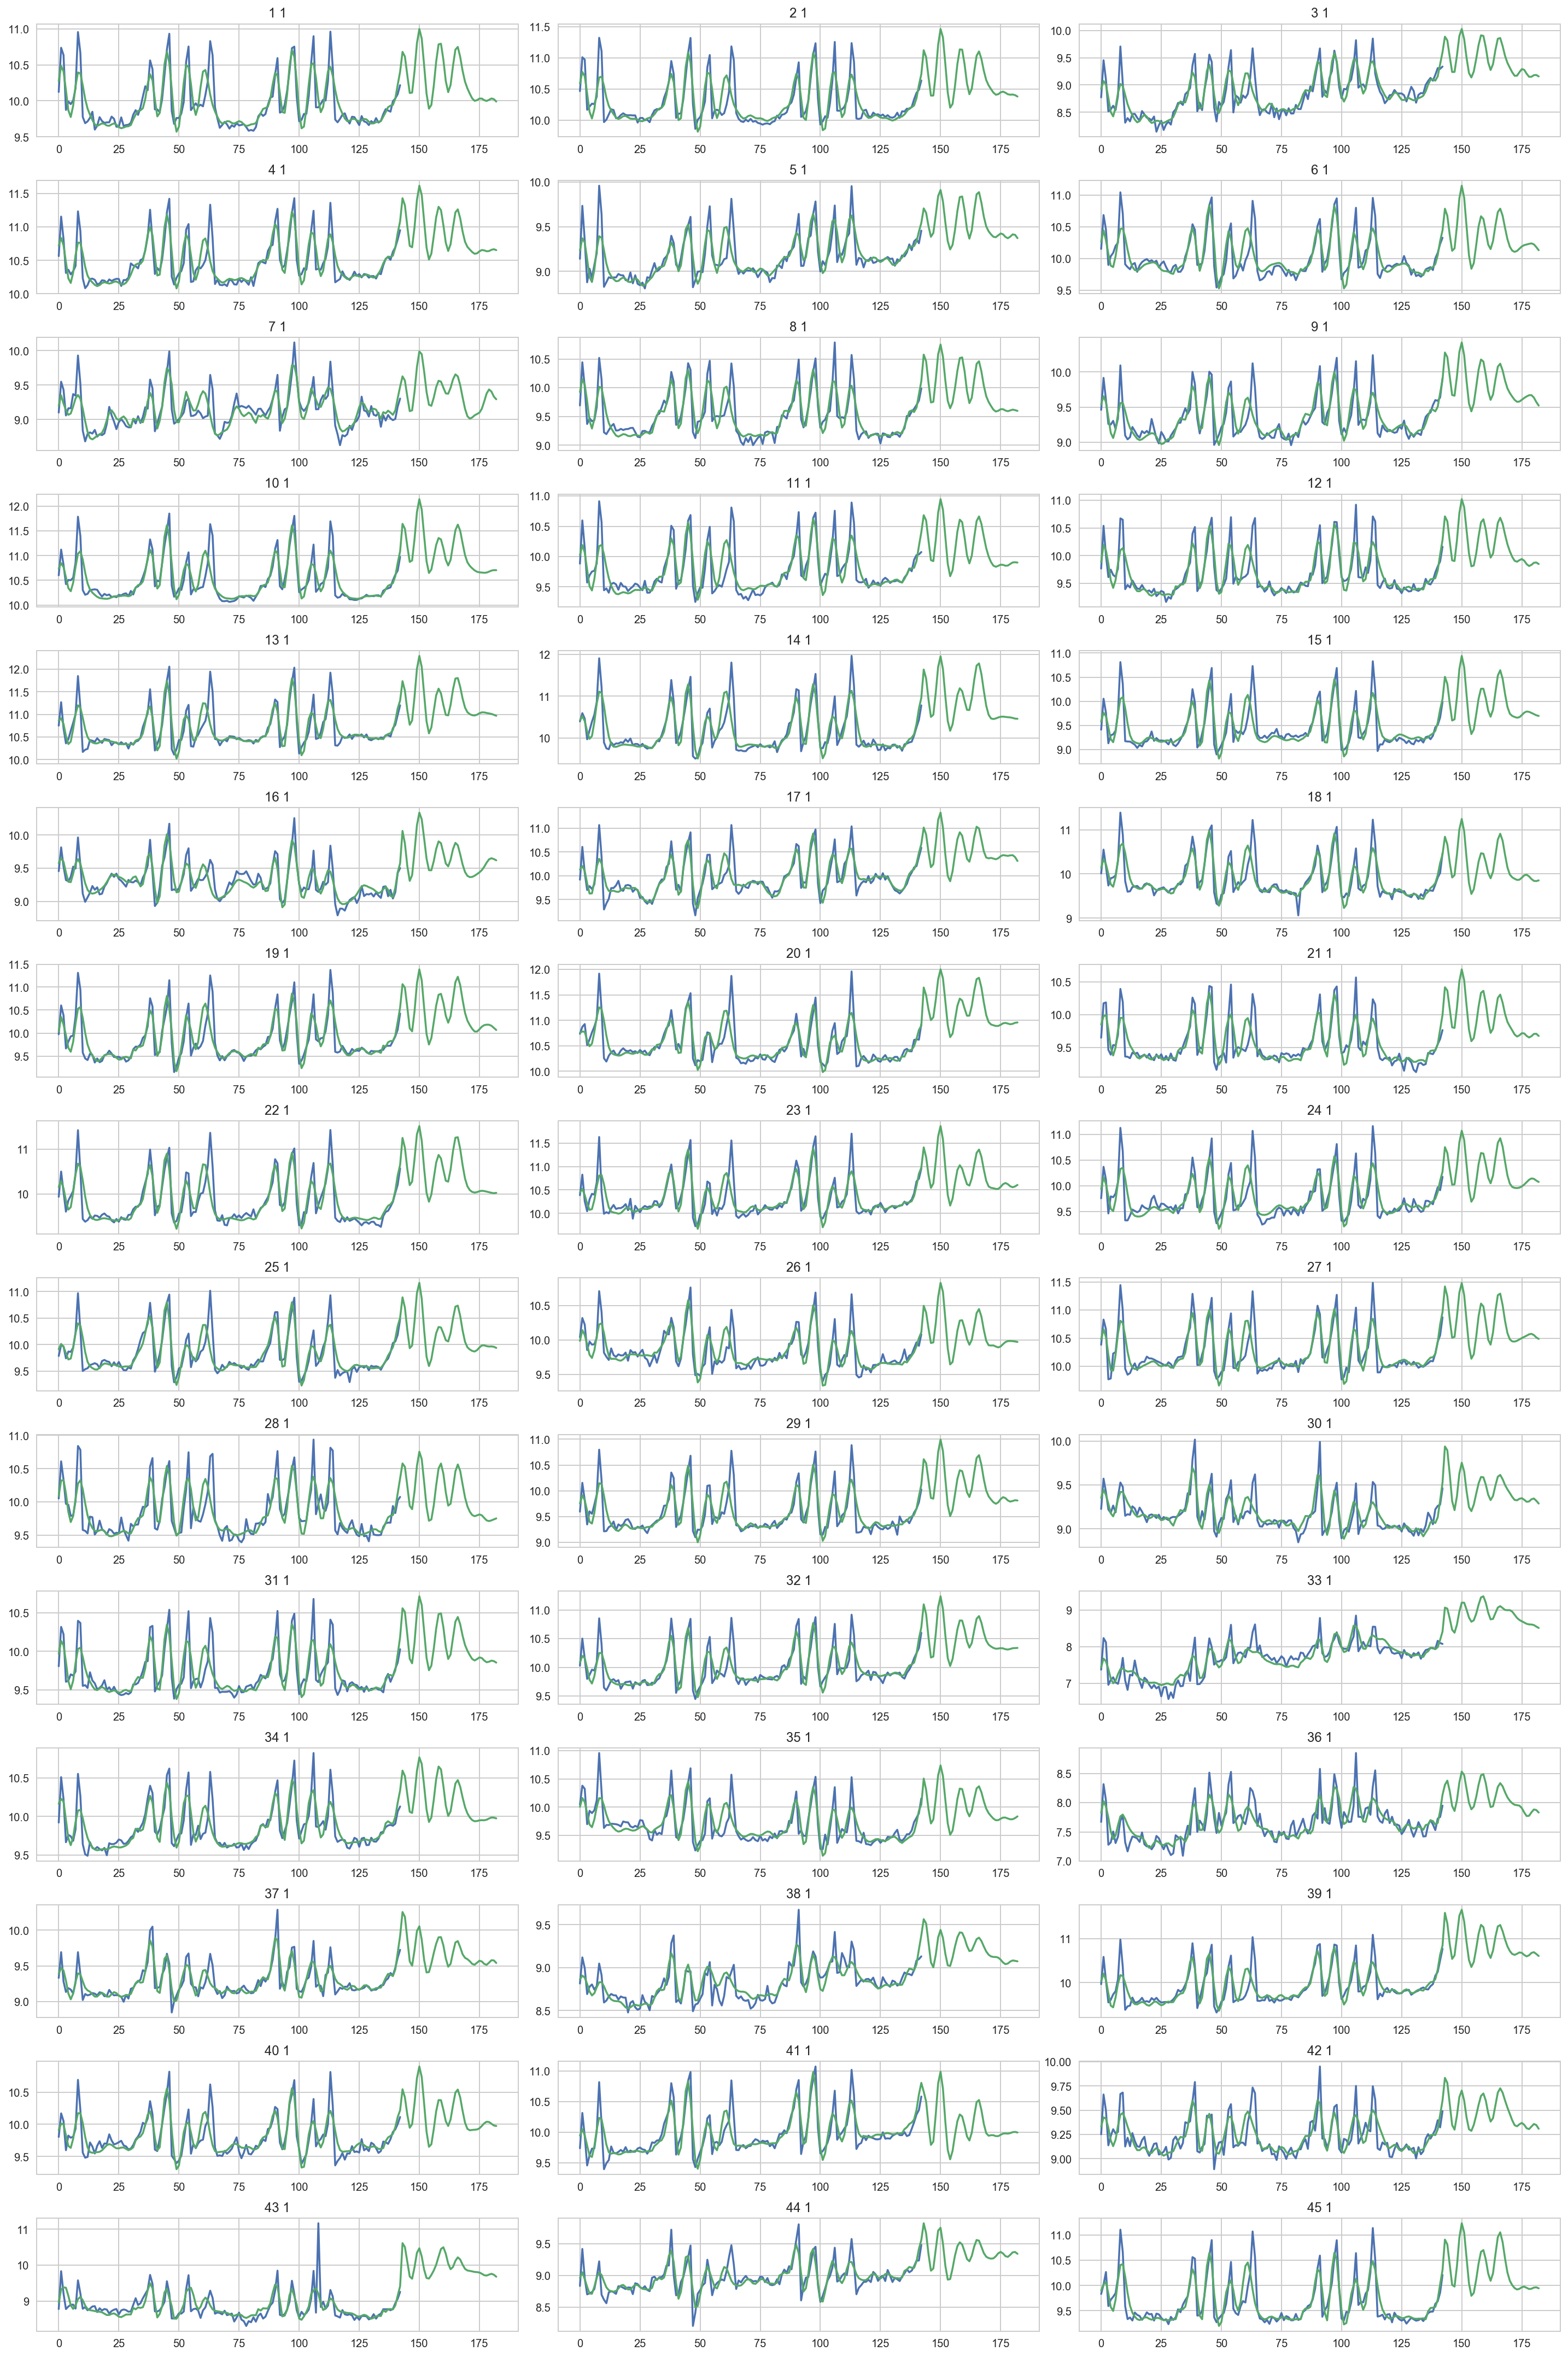

In [139]:
d=1
stmp = merged[merged['Dept']==d]
stores = stmp['Store'].unique()
plt.figure(figsize=(20, 30))
for idx, s in enumerate(stores):
    series = stmp[stmp['Store']==s]
    
    series = series[['Date','Weekly_Sales']].reset_index(drop=True)
    series.columns=['ds','y']
    series['y'] = minmax_scale(series['y'])
    #series['y'] = np.log(series['y'])
    series['cap'] = series['y'].max()
    series['floor'] = series['y'].min()

    m = Prophet(growth='logistic', holidays=holiday, weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=True)
    
    m.fit(series)

    future = m.make_future_dataframe(40, freq='w')
    future['cap'] = series['y'].max()
    future['floor'] = series['y'].min()

    forecast = m.predict(future)
    #forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    # plt.figure(figsize=(20, 5))
    # ax = plt.subplot(1,1,1)
    # fig1 = m.plot(forecast, ax=ax)

    plt.subplot(math.ceil(len(stores) / 3), 3, idx+1)
    plt.plot(series['y'])
    plt.plot(forecast['yhat'])
    plt.title('{} {}'.format(s, d));
    
plt.tight_layout(pad=1, h_pad=1)
plt.show()

- 추세는 비슷하지만 편향을 맞추지 못한다

In [450]:
d = 1
stmp = merged[merged['Dept']==d]
stores = stmp['Store'].unique()
plt.figure(figsize=(20, 30))
for idx, s in enumerate(stores):
    series = stmp[stmp['Store']==s]
    break

<Figure size 1440x2160 with 0 Axes>

In [451]:
avg = series.pivot_table('Weekly_Sales','year','week', aggfunc='mean').mean(axis=0)

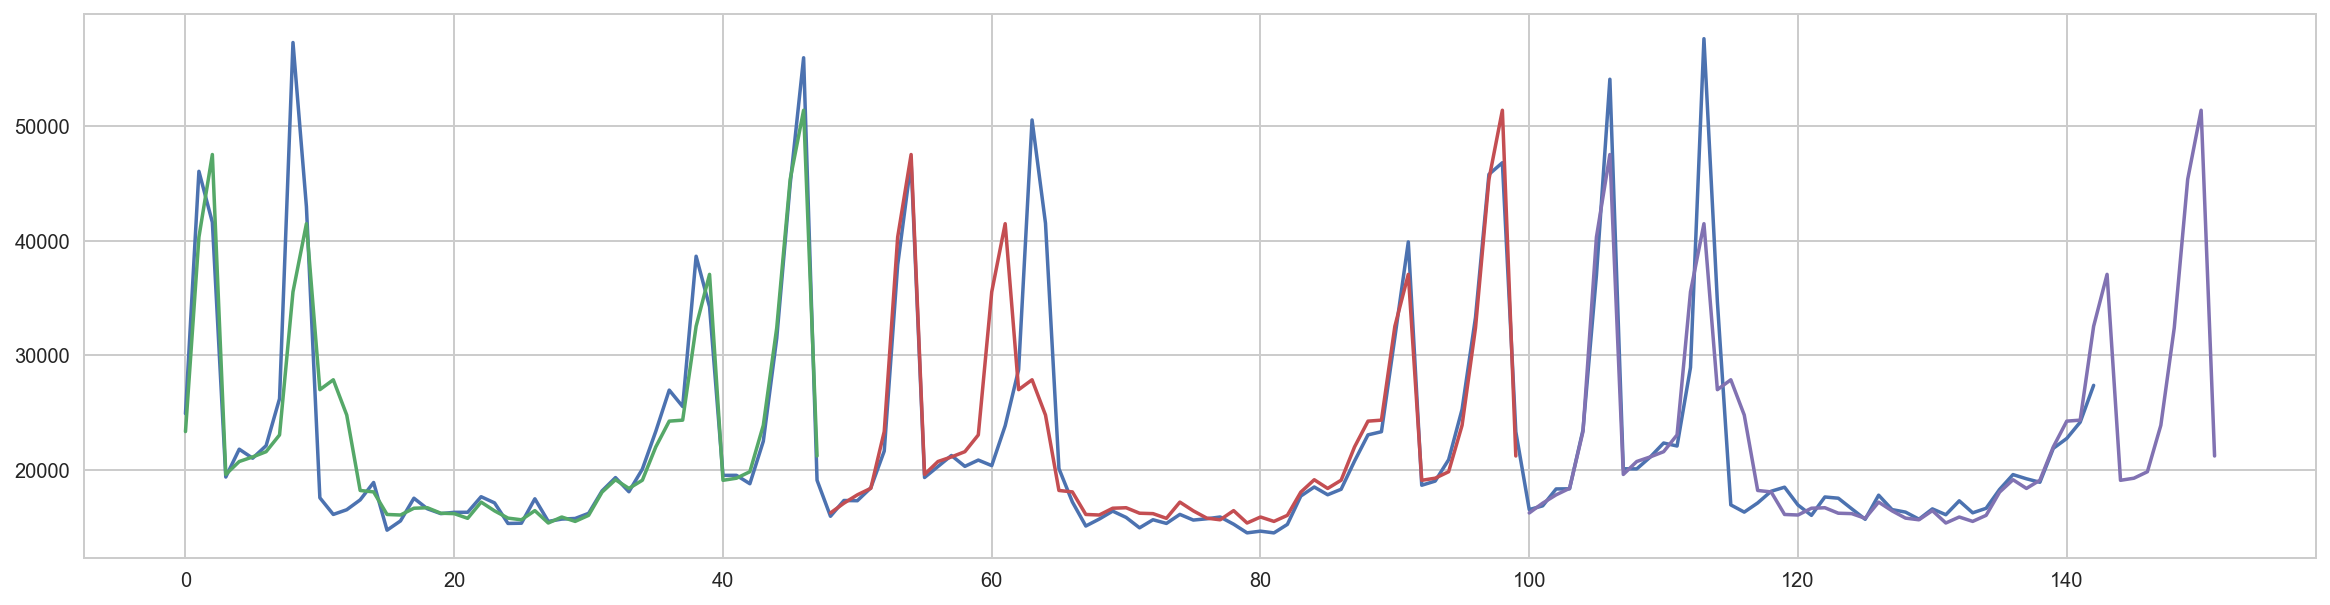

In [454]:
plt.figure(figsize=(20, 5))
plt.plot(series['Weekly_Sales'].values)
plt.plot(avg[4:].values)
plt.plot(list(range(48, 48+len(avg))), avg.values)
plt.plot(list(range(48+52, 48+52+len(avg))), avg.values)

In [ ]:
0212,0219, 0402, 0409, 1029,1105, 1210, 1217, 1224

In [497]:
series[series['IsHoliday']][['Date','week']].sort_values(by='Date')

,Date,week
73,2010-02-12,6
2218,2010-09-10,36
3014,2010-11-26,47
3372,2010-12-31,52
3800,2011-02-11,6
5940,2011-09-09,36
6731,2011-11-25,47
7096,2011-12-30,52
7527,2012-02-10,6
9667,2012-09-07,36


In [490]:
t10 = series[series['year']==2010]
t10['wr'] = t10['Weekly_Sales'] / t10['Weekly_Sales'].sum()
t10.sort_values(by='wr', ascending=False)[['Date','Weekly_Sales','week','wr']][:10].sort_values('Date')

,Date,Weekly_Sales,week,wr
73,2010-02-12,46039.49,6,0.040875
145,2010-02-19,41595.55,7,0.036930
580,2010-04-02,57258.43,13,0.050835
652,2010-04-09,42960.91,14,0.038142
2579,2010-10-15,26978.34,41,0.023952
2725,2010-10-29,38640.93,43,0.034306
2797,2010-11-05,34238.88,44,0.030398
3157,2010-12-10,31497.65,49,0.027964
3228,2010-12-17,44912.86,50,0.039875
3300,2010-12-24,55931.23,51,0.049657


In [492]:
t11 = series[series['year']==2011]
t11['wr'] = t11['Weekly_Sales'] / t11['Weekly_Sales'].sum()
t11.sort_values(by='wr', ascending=False)[['Date','Weekly_Sales','week','wr']][:10].sort_values('Date')

,Date,Weekly_Sales,week,wr
3800,2011-02-11,37887.17,6,0.032339
3872,2011-02-18,46845.87,7,0.039986
4448,2011-04-15,28762.37,15,0.024551
4519,2011-04-22,50510.31,16,0.043114
4591,2011-04-29,41512.39,17,0.035434
6443,2011-10-28,31579.90,43,0.026956
6515,2011-11-04,39886.06,44,0.034046
6877,2011-12-09,33305.92,49,0.028429
6950,2011-12-16,45773.03,50,0.039070
7022,2011-12-23,46788.75,51,0.039937


In [491]:
t12 = series[series['year']==2012]
t12['wr'] = t12['Weekly_Sales'] / t12['Weekly_Sales'].sum()
t12.sort_values(by='wr', ascending=False)[['Date','Weekly_Sales','week','wr']][:7].sort_values('Date')

,Date,Weekly_Sales,week,wr
7527,2012-02-10,36988.49,6,0.040139
7600,2012-02-17,54060.10,7,0.058665
8031,2012-03-30,28952.86,13,0.031419
8102,2012-04-06,57592.12,14,0.062498
8174,2012-04-13,34684.21,15,0.037639
10101,2012-10-19,24185.27,42,0.026245
10172,2012-10-26,27390.81,43,0.029724


In [368]:
def serarch(df, s, d):
    return df[(df['Store']==s)&(df['Dept']==d)]

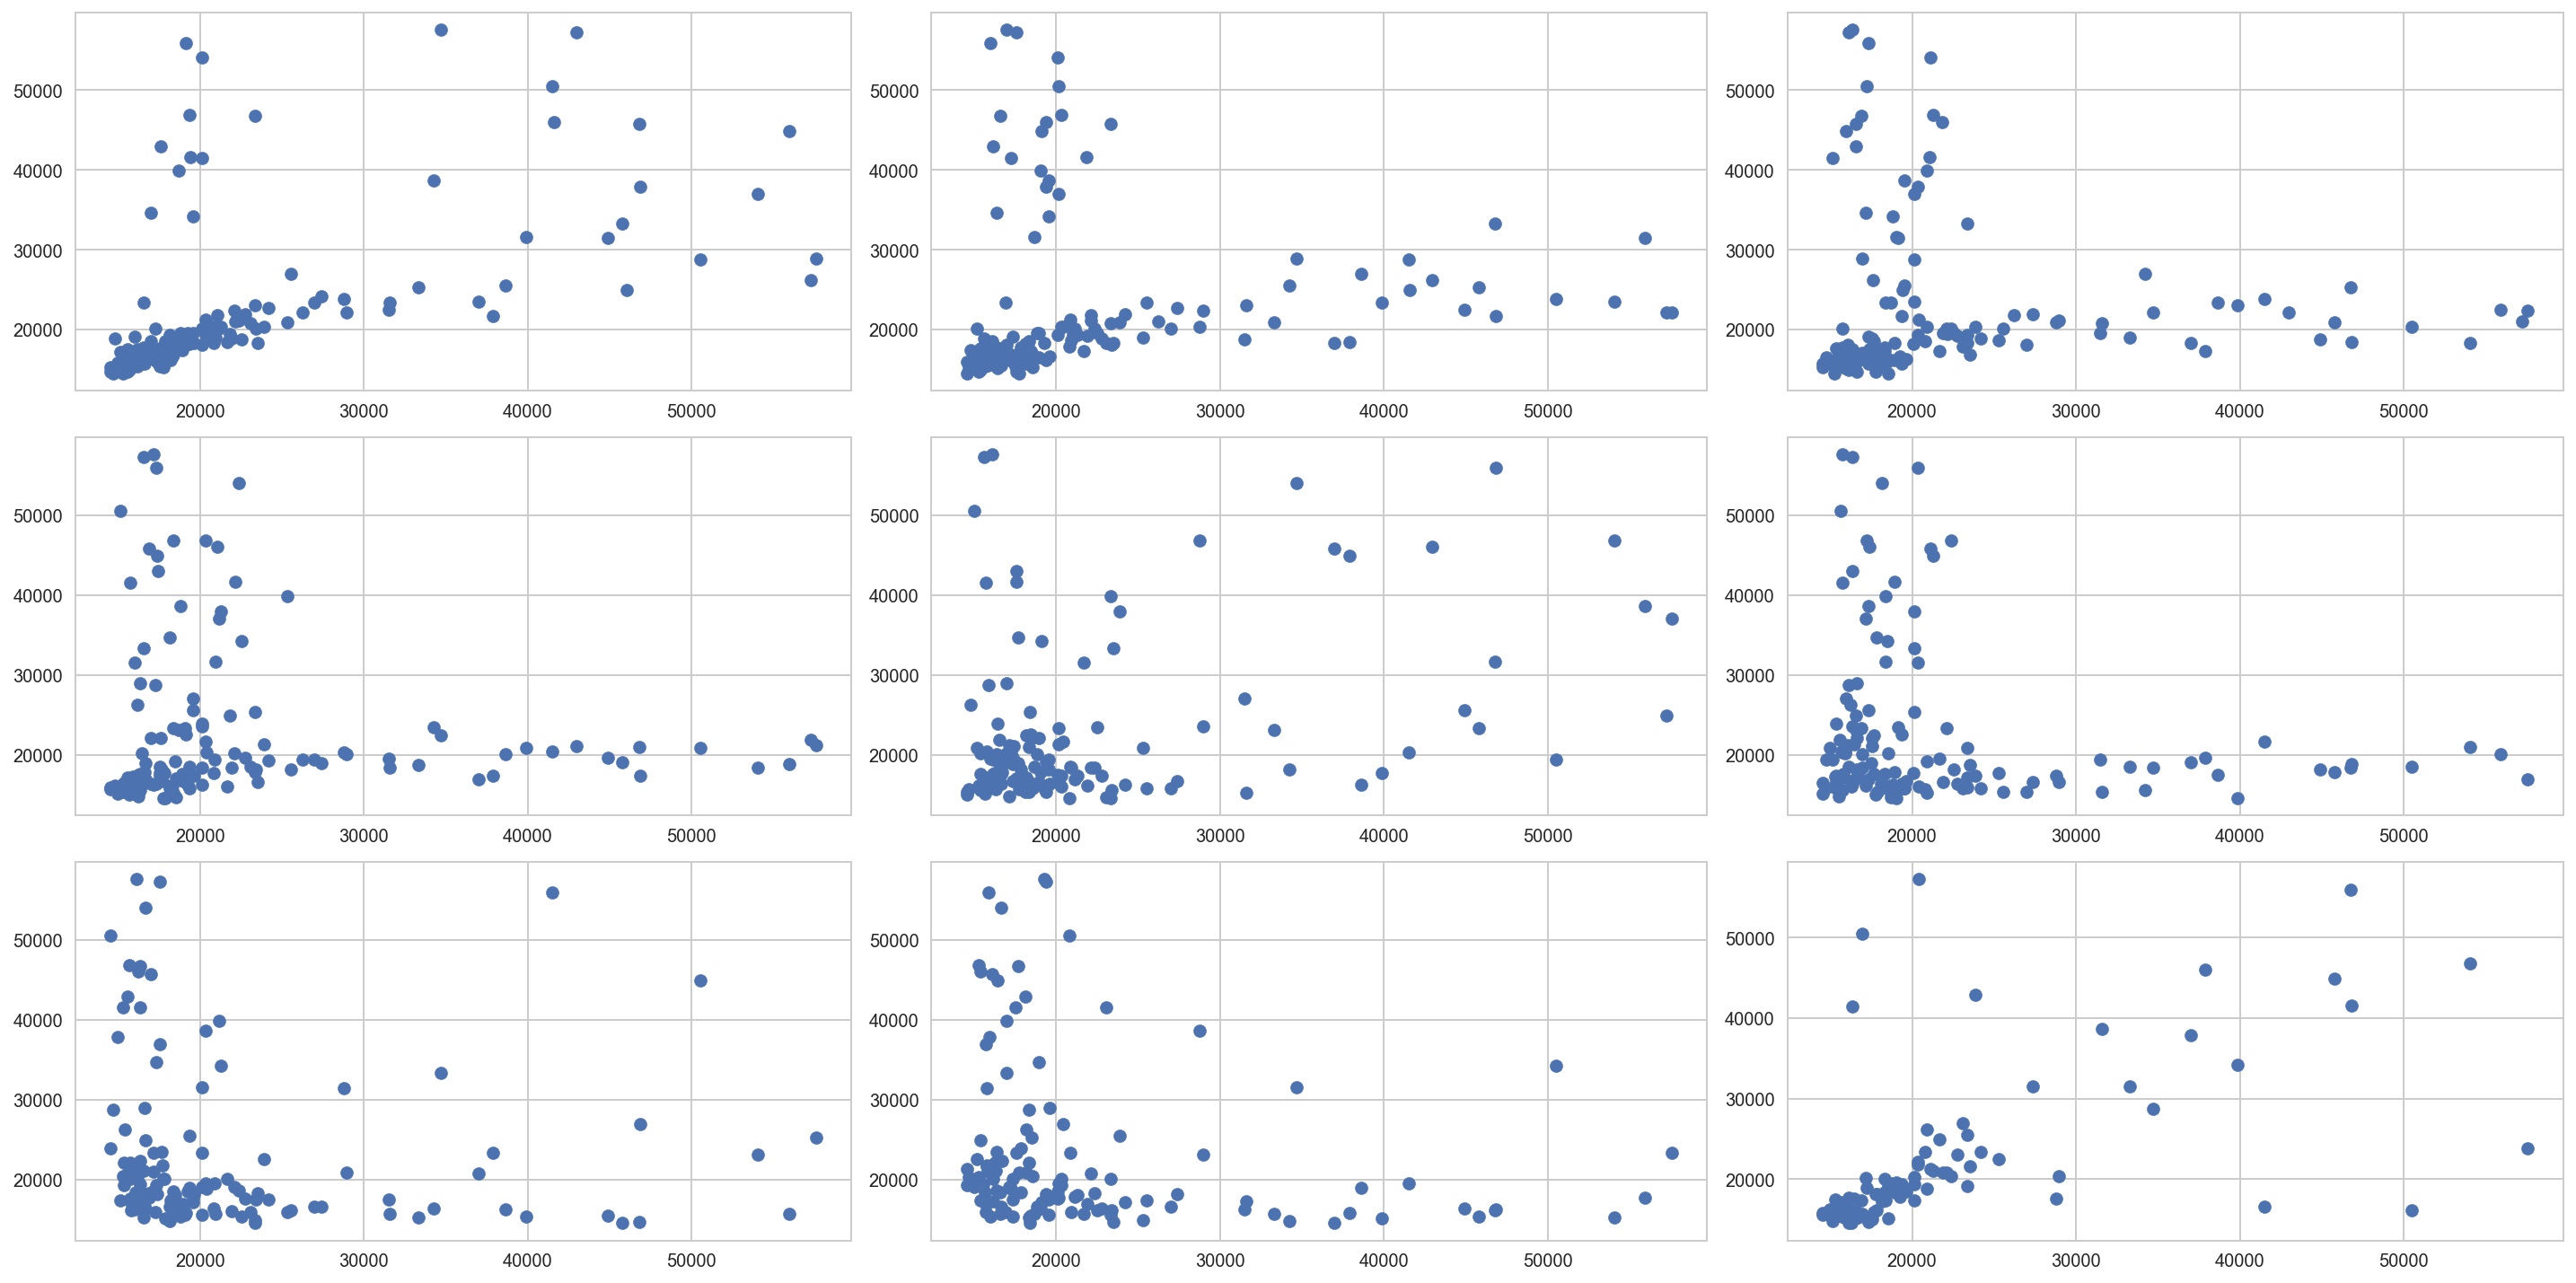

In [138]:
plt.figure(figsize=(20, 10))
for idx, wp in enumerate([1, 2, 3, 4, 8, 12, 18, 24, 52]):
    lag1 = merged.copy()
    lag1['int_week'] += wp
    lag1 = lag1.rename(columns={'Weekly_Sales': 'Weekly_Sales_p1'})
    lag1 = lag1[['Store','Dept','Weekly_Sales_p1','int_week']]
    #tmp = pd.merge(merged, lag1, how='left', on=['Store','Dept','int_week'])
    
    tmp1 = serarch(merged, 1, 1)
    tmp2 = serarch(lag1, 1, 1)
    tmp3 = tmp1.merge(tmp2, how='left', on=['int_week'])
    tmp3 = tmp3[~tmp3['Weekly_Sales_p1'].isnull()]
    plt.subplot(3,3,idx+1)
    plt.scatter(tmp3['Weekly_Sales'].values, tmp3['Weekly_Sales_p1'].values)
plt.tight_layout(pad=1, h_pad=1)
plt.show();

### 누락 데이터 확인

In [400]:
depts = merged['Dept'].value_counts().sort_index().index.tolist()

In [411]:
count = merged.pivot_table('Date','Store','Dept',aggfunc='count', fill_value=-1)

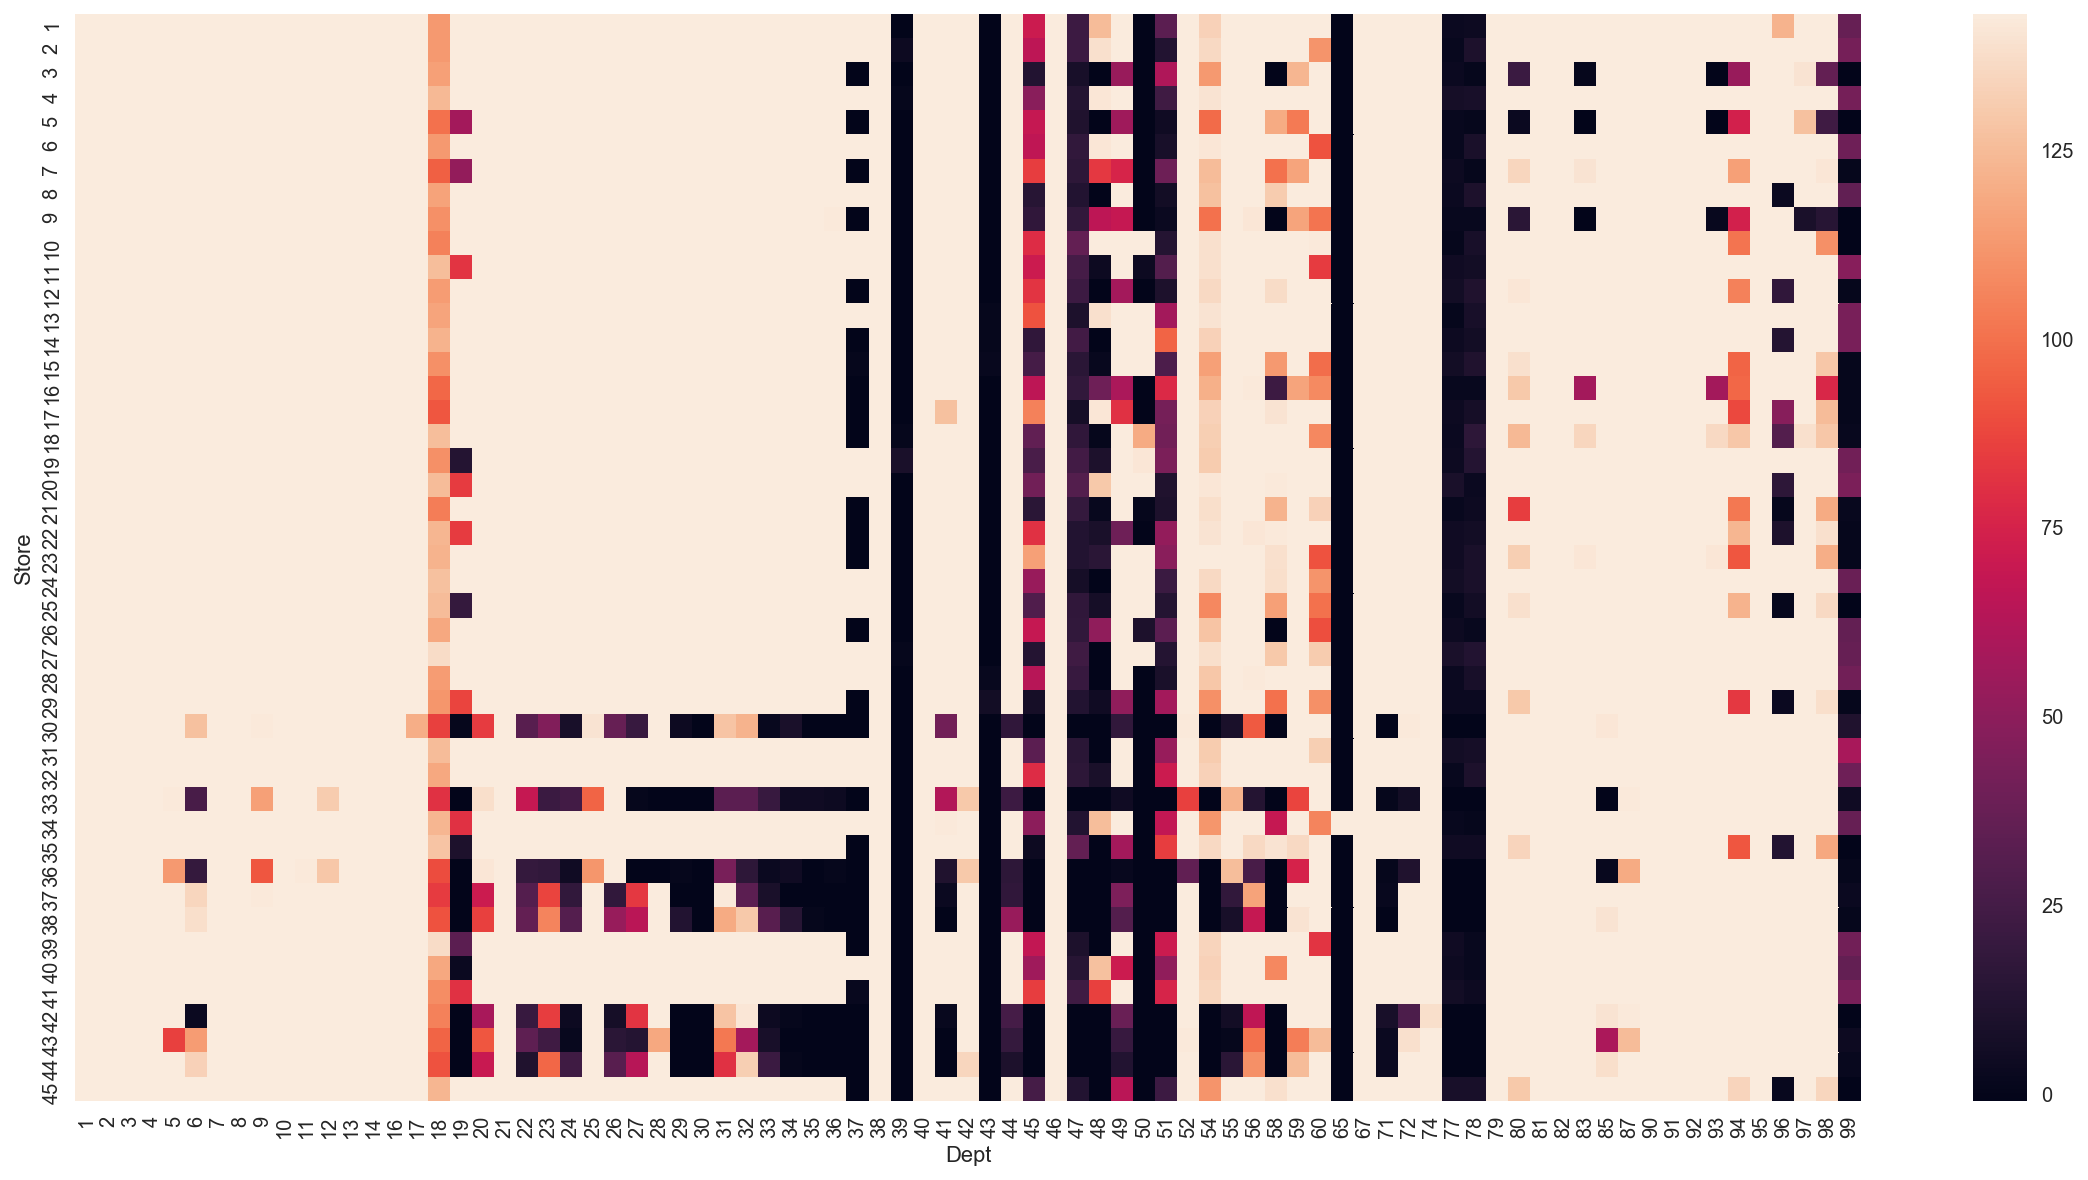

In [412]:
plt.figure(figsize=(20, 10))
sns.heatmap(count)

In [417]:
plt.figure(figsize=(20, 5))
for d in depts:
    res = []
    for s in range(1, 46):
        tmp = serarch(merged, s, d)['Weekly_Sales'].values
        
        res.append(tmp)
    break

<Figure size 1440x360 with 0 Axes>

In [420]:
res

[array([24924.5 , 46039.49, 41595.55, 19403.54, 21827.9 , 21043.39,
        22136.64, 26229.21, 57258.43, 42960.91, 17596.96, 16145.35,
        16555.11, 17413.94, 18926.74, 14773.04, 15580.43, 17558.09,
        16637.62, 16216.27, 16328.72, 16333.14, 17688.76, 17150.84,
        15360.45, 15381.82, 17508.41, 15536.4 , 15740.13, 15793.87,
        16241.78, 18194.74, 19354.23, 18122.52, 20094.19, 23388.03,
        26978.34, 25543.04, 38640.93, 34238.88, 19549.39, 19552.84,
        18820.29, 22517.56, 31497.65, 44912.86, 55931.23, 19124.58,
        15984.24, 17359.7 , 17341.47, 18461.18, 21665.76, 37887.17,
        46845.87, 19363.83, 20327.61, 21280.4 , 20334.23, 20881.1 ,
        20398.09, 23873.79, 28762.37, 50510.31, 41512.39, 20138.19,
        17235.15, 15136.78, 15741.6 , 16434.15, 15883.52, 14978.09,
        15682.81, 15363.5 , 16148.87, 15654.85, 15766.6 , 15922.41,
        15295.55, 14539.79, 14689.24, 14537.37, 15277.27, 17746.68,
        18535.48, 17859.3 , 18337.68, 20797.58, 